In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['agg.path.chunksize'] = 1024
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor,plot_importance
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import gc
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("/content/For_modeling.csv")
df.drop("Unnamed: 0", axis = 1, inplace=True)

In [ ]:
X= df.drop("Duration", axis = 1)
#Here X contains all the features except Duration
#Here y contains  Duration features

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (15, 15), dpi=800)
sns.heatmap(X.corr(), annot  = True, fmt = ".2f")

<Axes: >

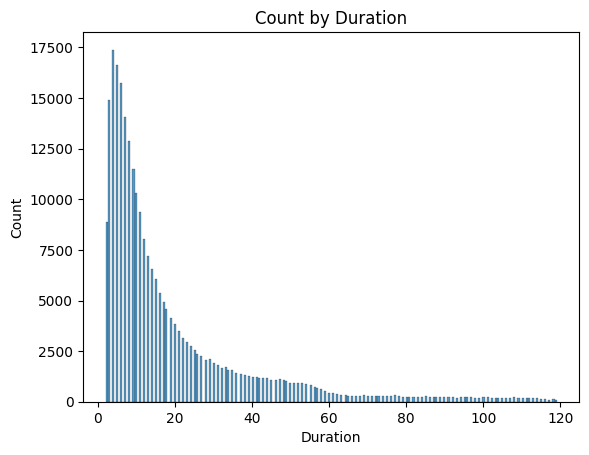

In [ ]:
y=df.Duration

sns.histplot(y)
plt.title('Count by Duration')
plt.show()
#X is an input feature and y is target variable

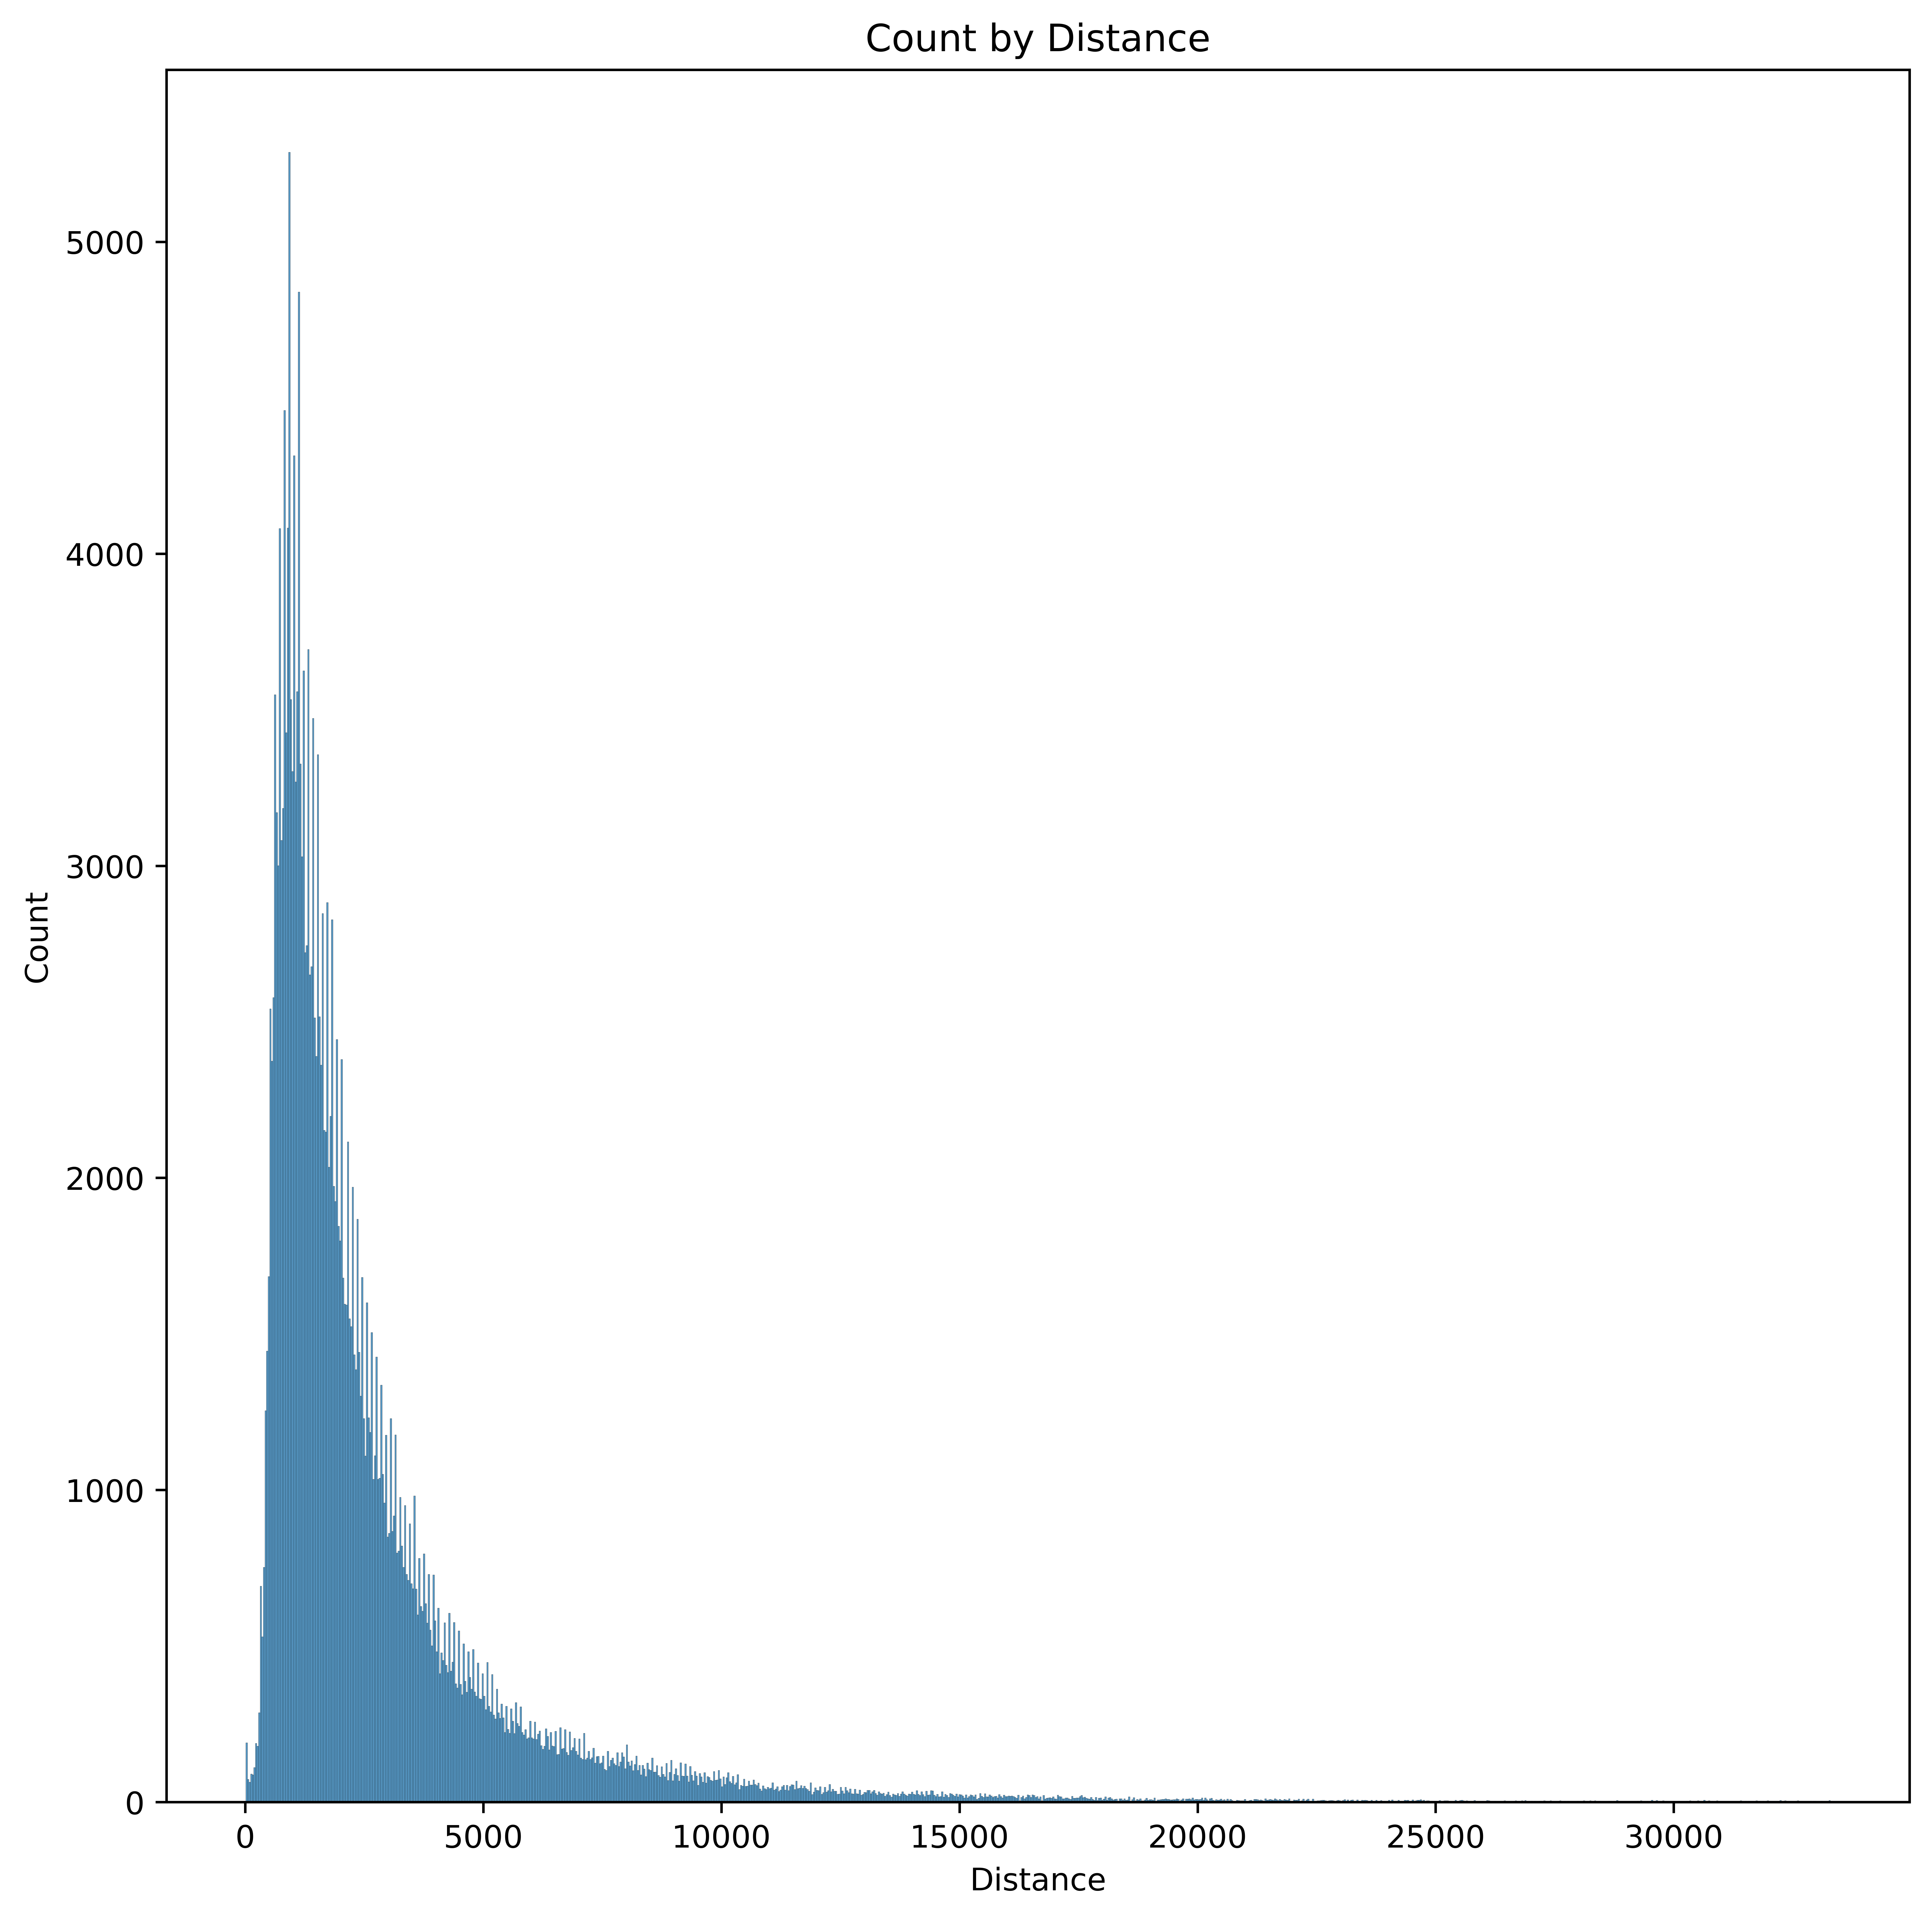

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (10, 10), dpi=800)
sns.histplot(X.Distance, bins = 1000)
plt.title('Count by Distance')
plt.show()

**This plot tells us that short trips of upto 5kms are common**

In [ ]:
average_values = df.groupby('Pday')['Duration'].mean().reset_index()
average_values.head()

Pday   Duration
0     1  21.217053
1     2  18.662414
2     3  18.098369
3     4  18.009975
4     5  17.271554

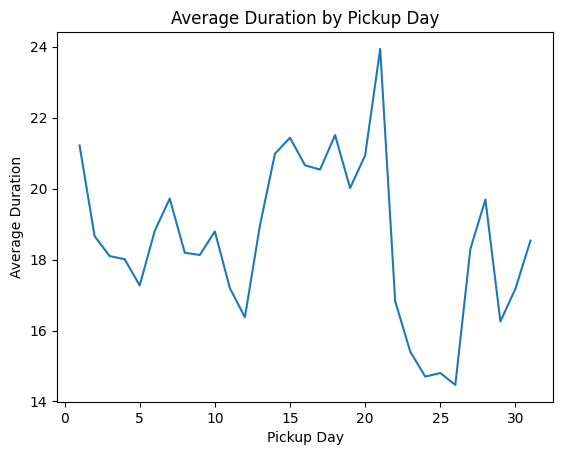

In [ ]:
sns.lineplot(x='Pday', y='Duration', data=average_values)

plt.xlabel('Pickup Day')
plt.ylabel('Average Duration')
plt.title('Average Duration by Pickup Day')
plt.show()

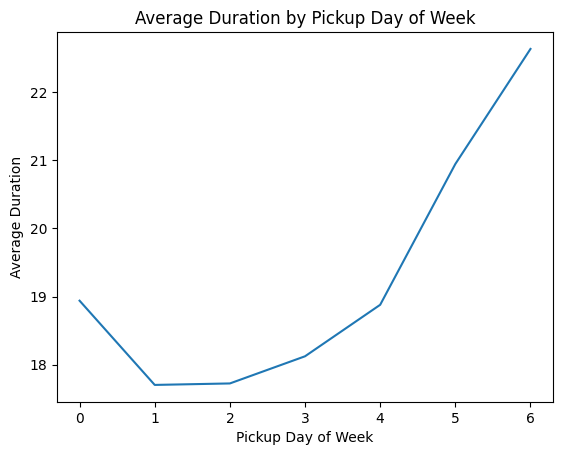

In [ ]:
average_values = df.groupby('PDweek')['Duration'].mean().reset_index()

sns.lineplot(x='PDweek', y='Duration', data=average_values)

plt.xlabel('Pickup Day of Week')
plt.ylabel('Average Duration')
plt.title('Average Duration by Pickup Day of Week')
plt.show()

**Weekends are seen as the most busy days in the week where maximum people do for cycling**

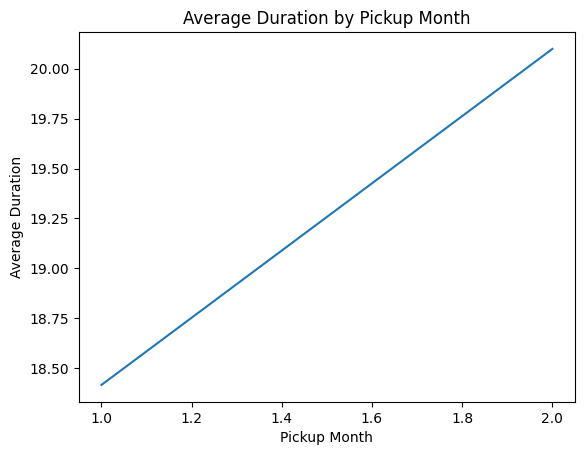

In [ ]:
average_values = df.groupby('Pmonth')['Duration'].mean().reset_index()

sns.lineplot(x='Pmonth', y='Duration', data=average_values)

plt.xlabel('Pickup Month')
plt.ylabel('Average Duration')
plt.title('Average Duration by Pickup Month')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Gradient Boosting

In [ ]:
GBR = GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.1, max_depth = 8, subsample = 0.8)

In [ ]:
GBR.fit(X_train, y_train)
gbr_pred = GBR.predict(X_test)
mse_gbr = mean_squared_error(y_test, gbr_pred)
print("Mean squared error of Gradient Boost: ",mse_gbr)

Mean squared error of Gradient Boost:  72.91531183225224


# Xtreme Gradient Booting

In [ ]:
XGB = XGBRegressor(n_estimators = 50, learning_rate = 0.1, max_depth = 8, subsample = 0.8)

In [ ]:
XGB.fit(X_train, y_train)
xgb_pred = XGB.predict(X_test)
mse_xgb = mean_squared_error(y_test, xgb_pred)
print("Mean squared error of Xtreme Gradient Boost: ",mse_xgb)

Mean squared error of Xtreme Gradient Boost:  72.1602086554309


# AdaBoost (Adaptive Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=50, learning_rate=1)
AdaBoost.fit(X_train, y_train)
Ada_pred = AdaBoost.predict(X_test)
mse_Adb = mean_squared_error(y_test, Ada_pred)
print("Mean squared error of Xtreme Gradient Boost: ",mse_Adb)

Mean squared error of Xtreme Gradient Boost:  249.31859394888866


# CatBoost with pooling

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor, Pool
CatB = CatBoostRegressor(n_estimators = 50, learning_rate = 0.1, max_depth = 8, subsample = 0.8)

In [ ]:
p_train = Pool(X_train, y_train, cat_features = ['Pmonth', 'Pday', 'Phour', 'PDweek', 'Dmonth', 'Dday', 'Dhour', 'DDweek'])
p_test = Pool(X_test, y_test, cat_features = ['Pmonth', 'Pday', 'Phour', 'PDweek', 'Dmonth', 'Dday', 'Dhour', 'DDweek'])
CatB.fit(p_train)
catb_pred = CatB.predict(p_test)
mse_cat1 = mean_squared_error(y_test, catb_pred)
print("Mean squared error of Cat Boost with pool: ",mse_cat1)

0:	learn: 19.7612394	total: 405ms	remaining: 19.8s
1:	learn: 18.7534004	total: 680ms	remaining: 16.3s
2:	learn: 17.8940476	total: 1.09s	remaining: 17s
3:	learn: 17.1551706	total: 1.36s	remaining: 15.7s
4:	learn: 16.5091069	total: 1.62s	remaining: 14.6s
5:	learn: 15.9659869	total: 1.9s	remaining: 14s
6:	learn: 15.4977533	total: 2.13s	remaining: 13.1s
7:	learn: 15.0961702	total: 2.39s	remaining: 12.6s
8:	learn: 14.7551969	total: 2.67s	remaining: 12.2s
9:	learn: 14.4761545	total: 3s	remaining: 12s
10:	learn: 14.2363743	total: 3.3s	remaining: 11.7s
11:	learn: 14.0293282	total: 3.83s	remaining: 12.1s
12:	learn: 13.8580288	total: 4.33s	remaining: 12.3s
13:	learn: 13.7158931	total: 4.88s	remaining: 12.5s
14:	learn: 13.5949207	total: 5.41s	remaining: 12.6s
15:	learn: 13.4917783	total: 5.94s	remaining: 12.6s
16:	learn: 13.4042889	total: 6.33s	remaining: 12.3s
17:	learn: 13.3247697	total: 6.67s	remaining: 11.9s
18:	learn: 13.2594118	total: 6.99s	remaining: 11.4s
19:	learn: 13.2082827	total: 7.36

# CatBoost without pooling

In [ ]:
p_train = Pool(X_train, y_train)
p_test = Pool(X_test, y_test)
CatB.fit(p_train)
catb2_pred = CatB.predict(p_test)
mse_cat2 = mean_squared_error(y_test, catb2_pred)
print("Mean squared error of Cat Boost with pool: ",mse_cat2)

0:	learn: 19.7486593	total: 119ms	remaining: 5.84s
1:	learn: 18.7376528	total: 196ms	remaining: 4.7s
2:	learn: 17.8729434	total: 309ms	remaining: 4.84s
3:	learn: 17.1377454	total: 424ms	remaining: 4.88s
4:	learn: 16.4964221	total: 524ms	remaining: 4.72s
5:	learn: 15.9399925	total: 633ms	remaining: 4.64s
6:	learn: 15.4713492	total: 726ms	remaining: 4.46s
7:	learn: 15.0663015	total: 779ms	remaining: 4.09s
8:	learn: 14.7257197	total: 827ms	remaining: 3.77s
9:	learn: 14.4421889	total: 880ms	remaining: 3.52s
10:	learn: 14.1947970	total: 929ms	remaining: 3.29s
11:	learn: 13.9796013	total: 974ms	remaining: 3.08s
12:	learn: 13.7980767	total: 1.02s	remaining: 2.91s
13:	learn: 13.6348112	total: 1.07s	remaining: 2.76s
14:	learn: 13.4823013	total: 1.13s	remaining: 2.64s
15:	learn: 13.3431539	total: 1.19s	remaining: 2.52s
16:	learn: 13.2437789	total: 1.24s	remaining: 2.41s
17:	learn: 13.1258088	total: 1.29s	remaining: 2.29s
18:	learn: 13.0416220	total: 1.34s	remaining: 2.19s
19:	learn: 12.9325069	t

Accuracy Comparisons

In [ ]:
from sklearn.metrics import accuracy_score
accuracyBG = accuracy_score(y_test, gbr_pred.round())
print(f"Accuracy of Gradient Boost: {accuracyBG:.4f}")
accuracyXGB = accuracy_score(y_test, xgb_pred.round())
print(f"Accuracy of XG boost: {accuracyXGB:.4f}")
accuracyCATB = accuracy_score(y_test, catb_pred.round())
print(f"Accuracy of CATBoost (pooling): {accuracyCATB:.4f}")
accuracyCATB2 = accuracy_score(y_test, catb2_pred.round())
print(f"Accuracy of CATBoost (non-pooling): {accuracyCATB2:.4f}")
accuracyCAD = accuracy_score(y_test, Ada_pred.round())
print(f"Accuracy of CAD Boost: {accuracyCAD:.4f}")

Accuracy of Gradient Boost: 0.1472
Accuracy of XG boost: 0.1474
Accuracy of CATBoost (pooling): 0.1068
Accuracy of CATBoost (non-pooling): 0.1068
Accuracy of CAD Boost: 0.1287


In [ ]:
acc = {
    "MSE Gradient Boost" : mse_gbr,
    "MSE Xtreme GB" : mse_xgb,
    "MSE AdaBoost" : mse_Adb,
    "MSE CatBoost with pool" : mse_cat1,
    "MSE CatBoost without pool" : mse_cat2
}

In [ ]:
acc = dict(sorted(acc.items()))
for i in acc:
    print(i, " : ", acc[i])

MSE AdaBoost  :  249.31859394888866
MSE CatBoost with pool  :  130.9364943527845
MSE CatBoost without pool  :  115.12235129338926
MSE Gradient Boost  :  72.91531183225224
MSE Xtreme GB  :  72.1602086554309


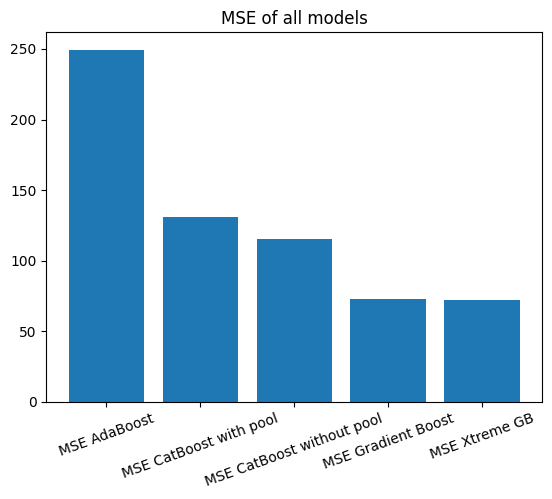

In [ ]:
# fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (7,7), dpi=800)
plt.bar(list(acc.keys()), list(acc.values()))
plt.title("MSE of all models")
plt.xticks(rotation=20)
plt.show()